In [2]:
import pandas as pd, numpy as np, seaborn as sns;
import matplotlib.pyplot as plt;
import sklearn;
from sklearn.tree import DecisionTreeClassifier as DTC;
from sklearn.model_selection import cross_val_predict;
from sklearn.metrics import classification_report;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.neighbors import LocalOutlierFactor;
from sklearn.model_selection import cross_validate;
from sklearn.preprocessing import KBinsDiscretizer;

import warnings;
warnings.filterwarnings('ignore')

In [4]:
music_data = pd.read_csv(r"..\data\Data\features_3_sec.csv")
music_data = music_data[['label','chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var','tempo']]
music_data.head()

numeric_data = music_data.select_dtypes(include=['int64','float64'])
cat_data = music_data.select_dtypes(exclude=['int64','float64'])


In [ ]:
music_data.info()

In [ ]:

cat_data.describe().to_csv("cat_description.csv")
music_data.describe().to_csv("num_description.csv")


In [ ]:
cat_data.describe()

In [ ]:
print(music_data.isnull().sum()/len(music_data)*100)


In [ ]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "tempo", data = music_data[["label", "tempo"]]);
plt.title('Tempo BoxPlot')
plt.ylabel("Tempo")
plt.xlabel("Genre")


Text(0.5, 0, 'Genre')

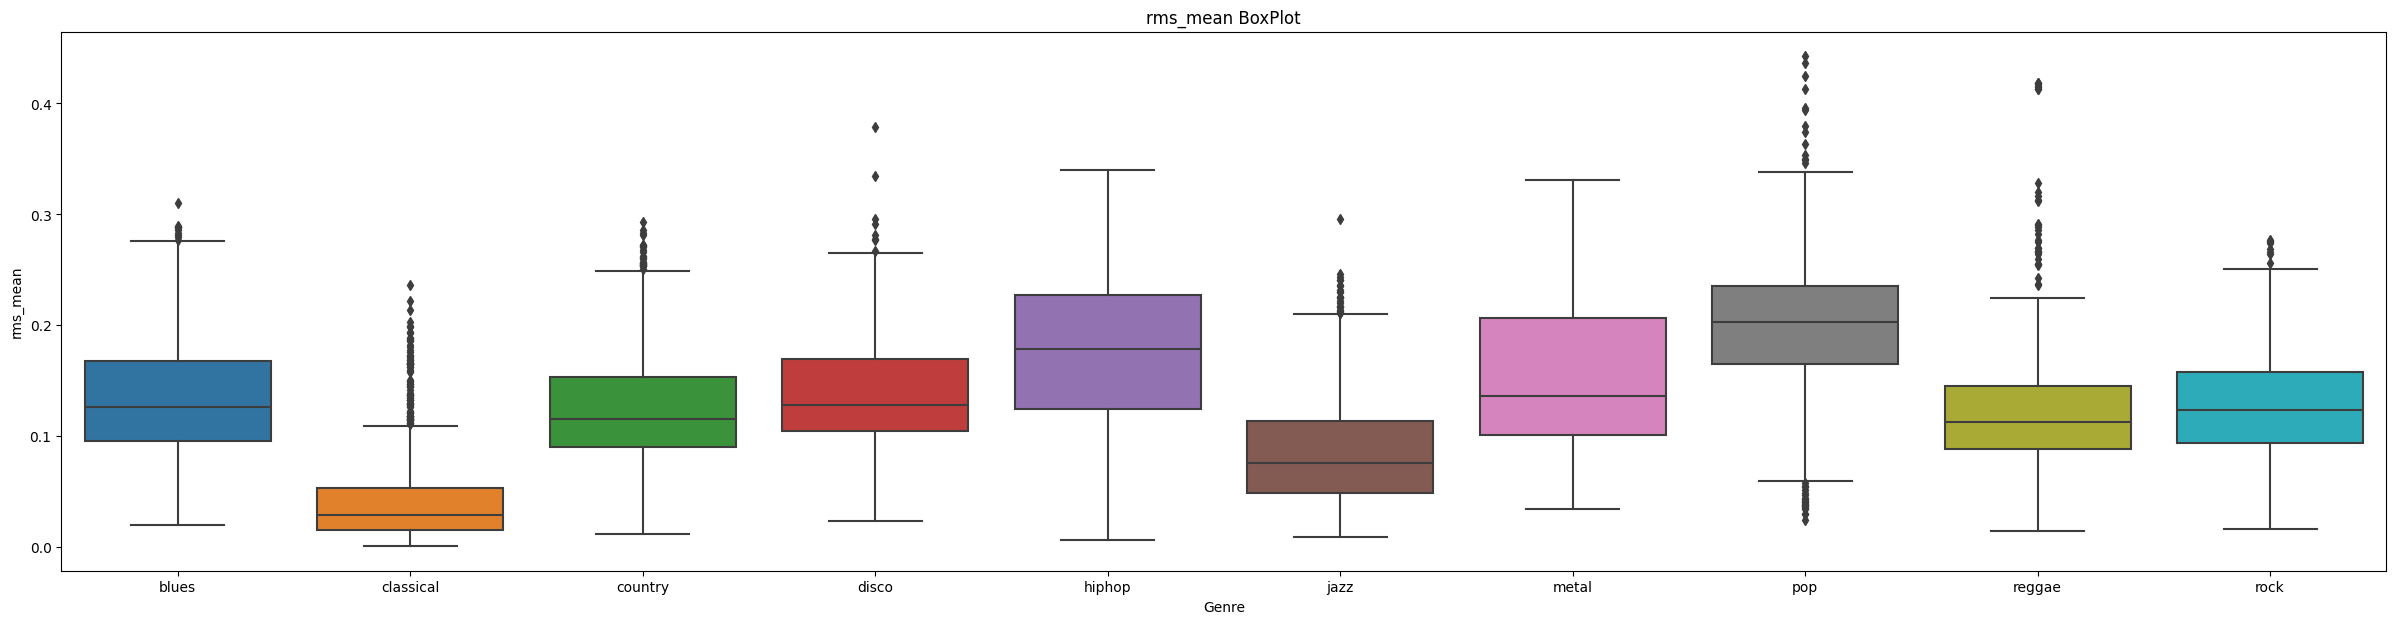

In [7]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "rms_mean", data = music_data[["label", "rms_mean"]]);
plt.title('rms_mean BoxPlot')
plt.ylabel("rms_mean")
plt.xlabel("Genre")

Text(0.5, 0, 'Genre')

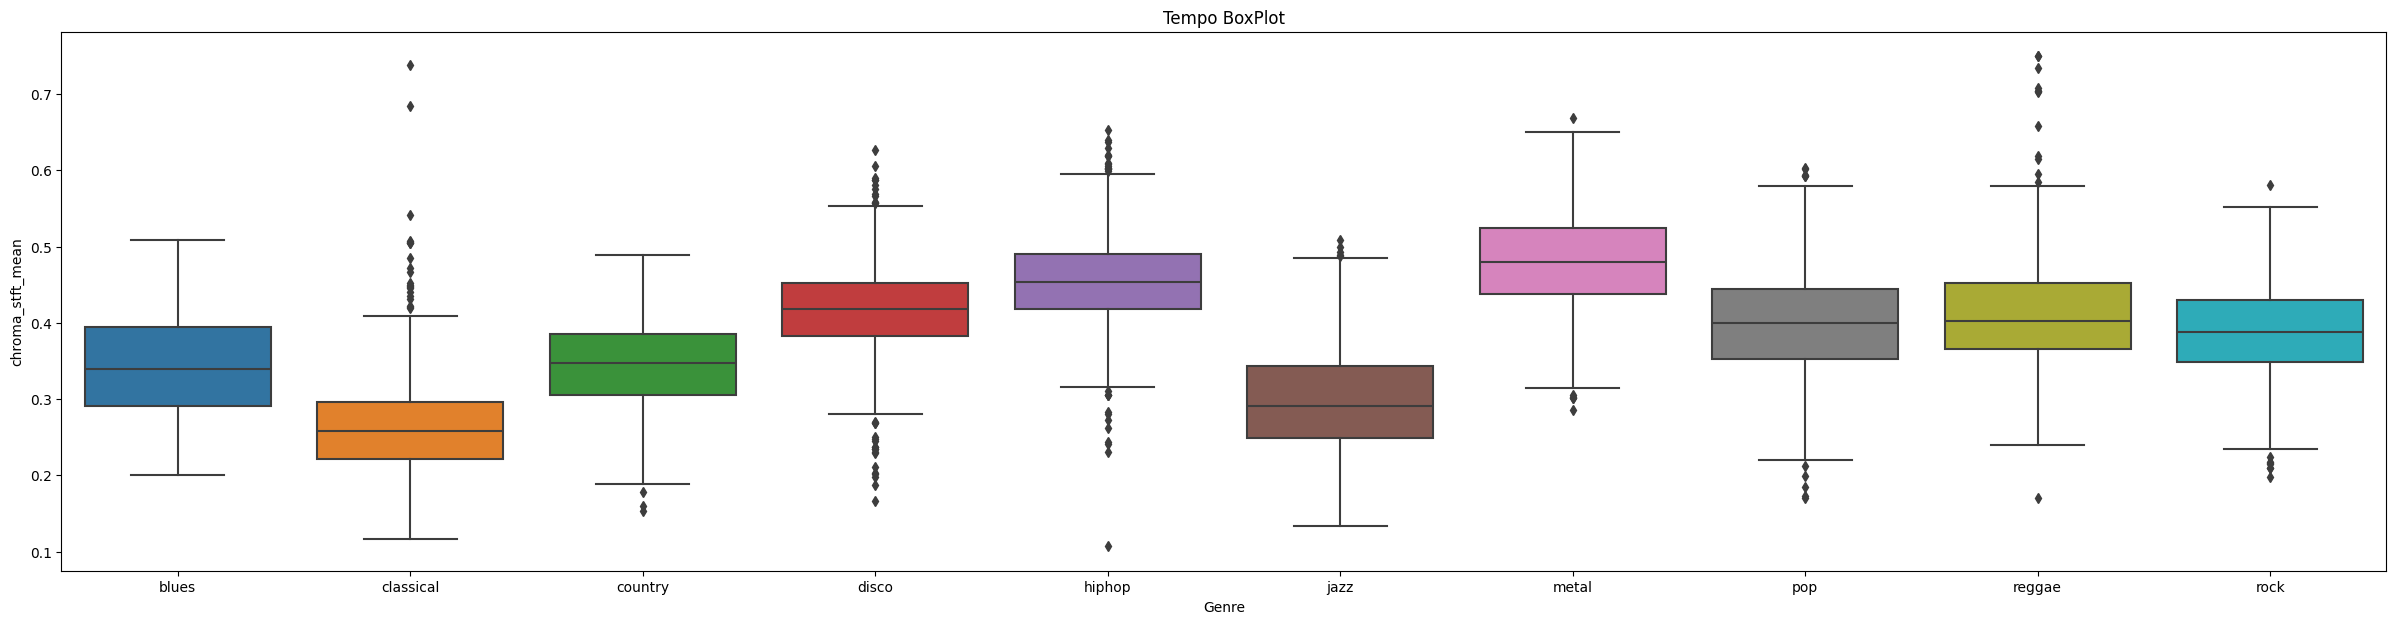

In [6]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "chroma_stft_mean", data = music_data[["label", "chroma_stft_mean"]]);
plt.title('chroma_stft_mean BoxPlot')
plt.ylabel("chroma_stft_mean")
plt.xlabel("Genre")

In [22]:
# music_data = music_data.set_index('label') 

# music_data = music_data.mean(axis=1)

# sns.heatmap(music_data, annot=True)

AttributeError: 'Series' object has no attribute 'set_index'